Data: [Kaggle](https://github.com/Doug-Vo/ML-Self-Project/pull/new/MSP-1_Set_up_doc)

## Topics to work

- Predicting sleeping time
- Clustering

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import set_config
set_config(transform_output="pandas")

df = pd.read_csv('Data/sleep_health.csv')

df


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [2]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    str    
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    str    
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    str    
 9   Blood Pressure           374 non-null    str    
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    str    
dtypes: float64(1), int64(7), str(5)
memory usage: 49.2 KB


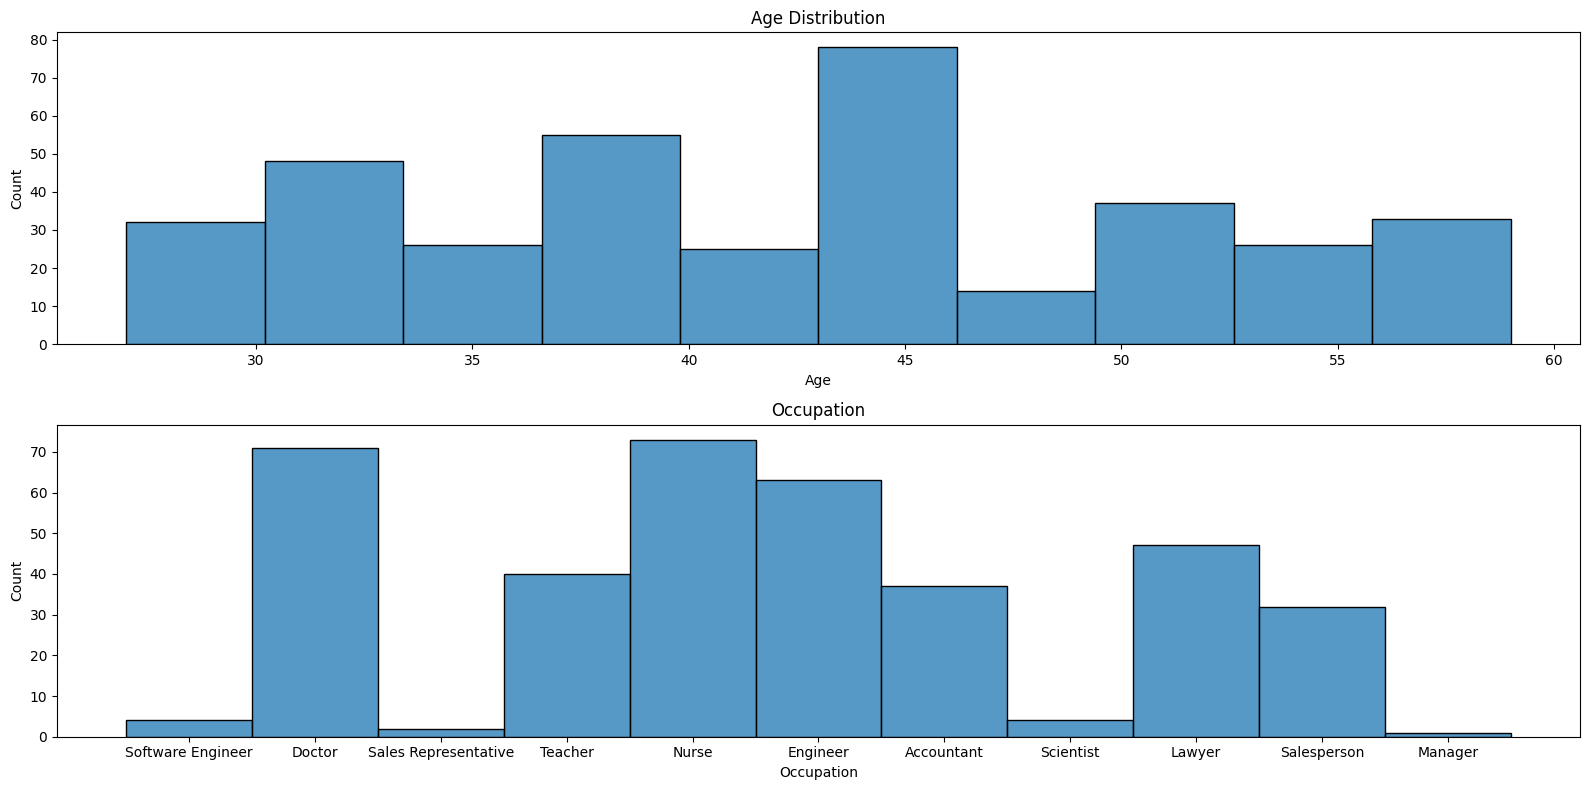

In [4]:
plt.figure(figsize = (16,8))


plt.subplot(2, 1, 1)


sns.histplot(df['Age'])
plt.title('Age Distribution')

plt.subplot(2,1,2)

sns.histplot(df['Occupation'])

plt.title("Occupation")

plt.tight_layout()
plt.show()

**Insight**

`Occupation` and `Age` does not have the best spread, but it's fine

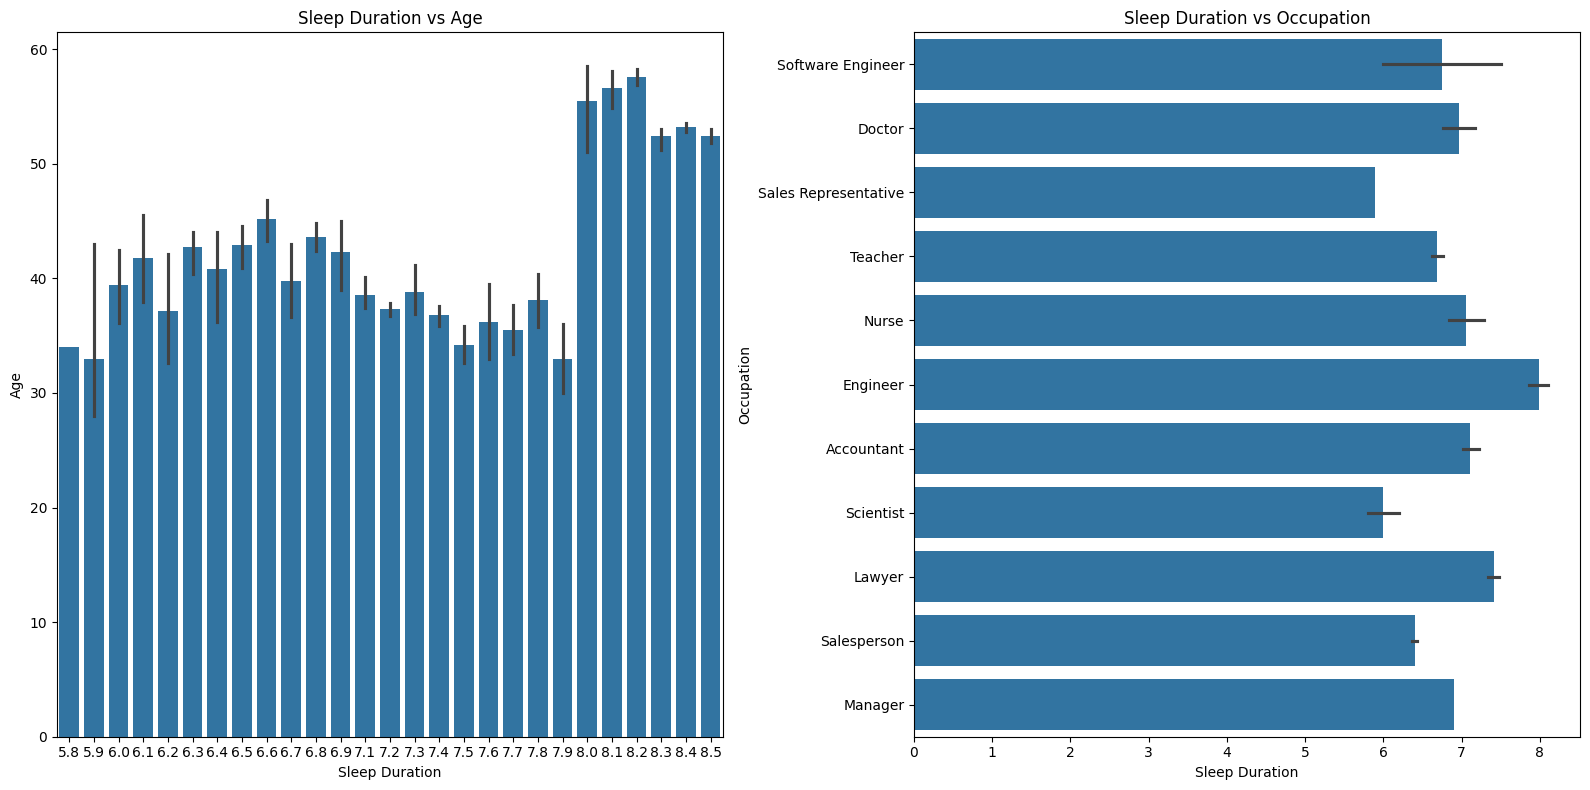

In [5]:


plt.figure(figsize = (16,8))

plt.subplot(1, 2, 1)
sns.barplot(df, x = 'Sleep Duration', y = 'Age')
plt.title("Sleep Duration vs Age")



plt.subplot(1, 2, 2)
sns.barplot(df, x = 'Sleep Duration', y = 'Occupation')
plt.title("Sleep Duration vs Occupation")
plt.tight_layout()
plt.show()



## **Preprocessing**

Let's look at missing values, min and max


In [6]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [7]:
print(df.describe().loc[['min', 'max']])

     Person ID   Age  Sleep Duration  Quality of Sleep  \
min        1.0  27.0             5.8               4.0   
max      374.0  59.0             8.5               9.0   

     Physical Activity Level  Stress Level  Heart Rate  Daily Steps  
min                     30.0           3.0        65.0       3000.0  
max                     90.0           8.0        86.0      10000.0  


In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    str    
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    str    
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    str    
 9   Blood Pressure           374 non-null    str    
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    str    
dtypes: float64(1), int64(7), str(5)
memory usage: 49.2 KB


**Insight**

We have no missing values or outliers
So let's label encode most of object feature. Let's have a look at those columns to know what we are dealing with

In [9]:
df['Sleep Disorder'].unique()

<ArrowStringArray>
[nan, 'Sleep Apnea', 'Insomnia']
Length: 3, dtype: str

In [10]:
df['Occupation'].unique()

<ArrowStringArray>
[   'Software Engineer',               'Doctor', 'Sales Representative',
              'Teacher',                'Nurse',             'Engineer',
           'Accountant',            'Scientist',               'Lawyer',
          'Salesperson',              'Manager']
Length: 11, dtype: str

In [11]:
df['BMI Category'].unique()

<ArrowStringArray>
['Overweight', 'Normal', 'Obese', 'Normal Weight']
Length: 4, dtype: str

In [12]:
df['Blood Pressure'].unique()

<ArrowStringArray>
['126/83', '125/80', '140/90', '120/80', '132/87', '130/86', '117/76',
 '118/76', '128/85', '131/86', '128/84', '115/75', '135/88', '129/84',
 '130/85', '115/78', '119/77', '121/79', '125/82', '135/90', '122/80',
 '142/92', '140/95', '139/91', '118/75']
Length: 25, dtype: str

It looks like `gender` and `Blood Pressure` will need special care

- `gender` will convert to boolean value (turn to `int`)
- `Blood Pressure` will be split into `Systolic` and `Diastolic`, based from my research `Systolic` matters more for *Sleep Quality* so we will use that for our correlation
- Notice in `BMI Category` there are `Normal` and `Normal Weight` and I assume that they are the same thing so we will merge them into one. And we will encode them using our mapping bellow
- The rest can be encode with `pd.get_dummies` 

In [13]:
bmi_mapping = {
    'Normal' : 0,
    'Normal Weight': 0,
    'Overweight': 1,
    'Obese': 2
}

df['BMI Category'] = df['BMI Category'].map(bmi_mapping)


In [14]:
df = pd.get_dummies(df, columns = ['Sleep Disorder', 'Occupation'], dtype = int)

df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand = True).astype(int)
df['is_Male'] = (df['Gender'] == "Male").astype(int)


# drop the unneeded columns
df = df.drop(columns = ['Blood Pressure', 'Gender'])
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Person ID                        374 non-null    int64  
 1   Age                              374 non-null    int64  
 2   Sleep Duration                   374 non-null    float64
 3   Quality of Sleep                 374 non-null    int64  
 4   Physical Activity Level          374 non-null    int64  
 5   Stress Level                     374 non-null    int64  
 6   BMI Category                     374 non-null    int64  
 7   Heart Rate                       374 non-null    int64  
 8   Daily Steps                      374 non-null    int64  
 9   Sleep Disorder_Insomnia          374 non-null    int64  
 10  Sleep Disorder_Sleep Apnea       374 non-null    int64  
 11  Occupation_Accountant            374 non-null    int64  
 12  Occupation_Doctor                

Since our target (`Sleep Duration`) has a wide range, that would be quite difficult to predict every class, so we will split them into 3 class [`low`,`mid`,`high`] as [1 ,2 ,3]



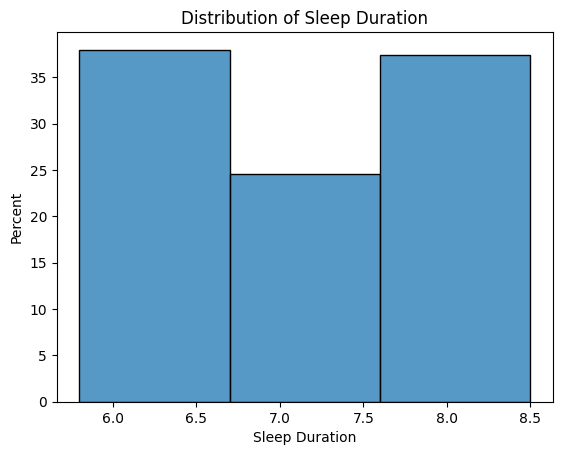

In [15]:

# Histogram
sns.histplot(df, x = "Sleep Duration", bins=3, stat = 'percent')
plt.title('Distribution of Sleep Duration')

plt.show()


In [16]:
df['Sleep Target'] = pd.qcut(df['Sleep Duration'], q= 3, labels= [1, 2, 3]).astype(int)

# Group by the new target and look at the Sleep Duration stats
ranges = df.groupby('Sleep Target')['Sleep Duration'].agg(['min', 'max', 'count'])
print(ranges)

              min  max  count
Sleep Target                 
1             5.8  6.6    142
2             6.7  7.7    126
3             7.8  8.5    106


In [17]:
df.columns

Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea',
       'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'Systolic', 'Diastolic', 'is_Male',
       'Sleep Target'],
      dtype='str')

Let's set up some **correlation matrix**, the onehot-encoded one will have their own separated table underneath

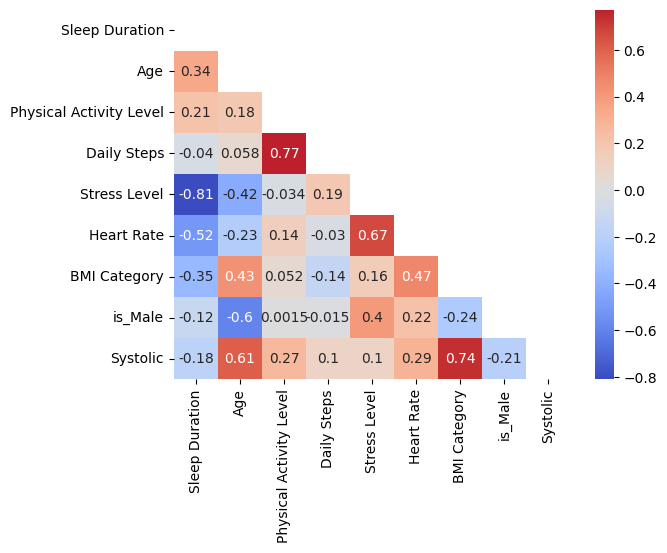

In [18]:
import numpy as np
corr_df = df[['Sleep Duration',
              'Age',
              'Physical Activity Level',
              'Daily Steps',
              'Stress Level',
              'Heart Rate',
              'BMI Category',
              'is_Male',
              'Systolic']].copy()

matrix = corr_df.corr()

mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(matrix, mask = mask, cmap = 'coolwarm', annot = True, center = 0)

plt.show()

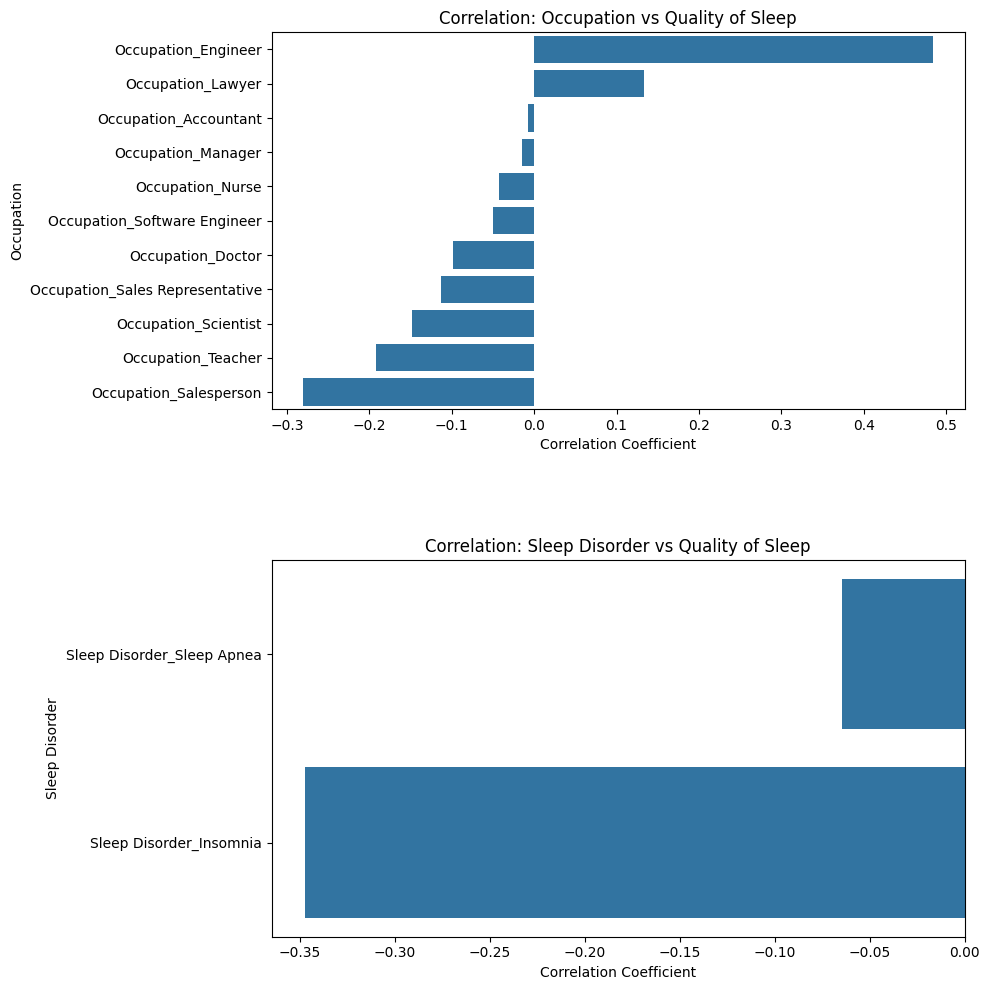

In [19]:


all_corr = df.corr()['Sleep Duration']

occ_corr = all_corr.filter(like='Occupation').sort_values(ascending=False)
sleep_dis_corr = all_corr.filter(like='Sleep Disorder').sort_values(ascending=False)


plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
sns.barplot(x=occ_corr.values, y=occ_corr.index)
plt.title('Correlation: Occupation vs Quality of Sleep')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Occupation')

plt.subplot(2, 1, 2)
sns.barplot(x=sleep_dis_corr.values, y=sleep_dis_corr.index)
plt.title('Correlation: Sleep Disorder vs Quality of Sleep')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Sleep Disorder')


plt.tight_layout()

plt.subplots_adjust(hspace=0.4)
plt.show()



In [20]:
df.columns

Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea',
       'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'Systolic', 'Diastolic', 'is_Male',
       'Sleep Target'],
      dtype='str')

We have a decent range of *correlation* hinting that our predicting model can operates well

I am also gonna do some *standard scaling*

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()
cols_to_use= ['Age',
              'Physical Activity Level',
              'Daily Steps',
              #'Stress Level',
              'Heart Rate',
              'BMI Category',
              'is_Male',
              'Systolic', 
              'Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea',
       'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher']

X = df[cols_to_use]
y = df['Sleep Target']


X_train, X_test,y_train, y_test = train_test_split(X, y, random_state= 8, train_size= 0.8)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


print(f"train shape: {X_train_scaled.shape}")
print(f"test shape: {X_test_scaled.shape}")


train shape: (299, 20)
test shape: (75, 20)


Since our data is quite small, we will be use `Random Forest` and base model of `Logistic Regression`

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


forest_model = RandomForestClassifier(random_state= 8, n_estimators= 100)
forest_model.fit(X_train_scaled, y_train)

base_model = LogisticRegression(random_state= 8, max_iter= 1000)
base_model.fit(X_train_scaled, y_train)


forest_y = forest_model.predict(X_test_scaled)
base_y = base_model.predict(X_test_scaled)


Let's set up some *metrics* and we can use **confusion matrix** to looks at our models

Forest Model
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        23
           2       0.88      0.90      0.89        31
           3       0.94      0.81      0.87        21

    accuracy                           0.91        75
   macro avg       0.91      0.90      0.91        75
weighted avg       0.91      0.91      0.91        75


Base Model
              precision    recall  f1-score   support

           1       0.88      0.96      0.92        23
           2       0.85      0.71      0.77        31
           3       0.75      0.86      0.80        21

    accuracy                           0.83        75
   macro avg       0.83      0.84      0.83        75
weighted avg       0.83      0.83      0.82        75



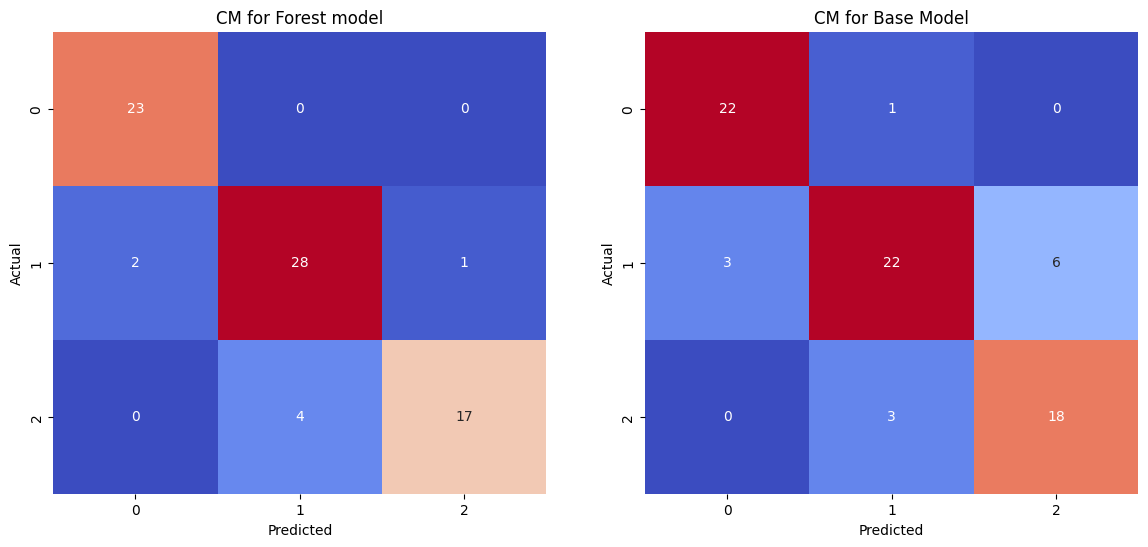

In [23]:
from sklearn.metrics import confusion_matrix, classification_report



print("Forest Model")
print(classification_report(y_test, forest_y))

print("\nBase Model")
print(classification_report(y_test, base_y))

cm_for = confusion_matrix(y_test, forest_y)
cm_base = confusion_matrix(y_test, base_y)


plt.figure(figsize = (14,6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_for, cmap = 'coolwarm', annot = True, fmt = 'd', cbar = False)
plt.title("CM for Forest model")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm_base, cmap = 'coolwarm', annot = True, fmt = 'd', cbar = False)
plt.title("CM for Base Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()


In [24]:
from sklearn.inspection import permutation_importance


X_test_scaled_df = pd.DataFrame(X_test_scaled, columns= X_train.columns)

result = permutation_importance(forest_model, X_test_scaled_df, y_test, n_repeats = 10
                                , random_state= 8)

features_name = cols_to_use

perm_import = pd.Series(result.importances_mean, index =features_name).sort_values(ascending=True)




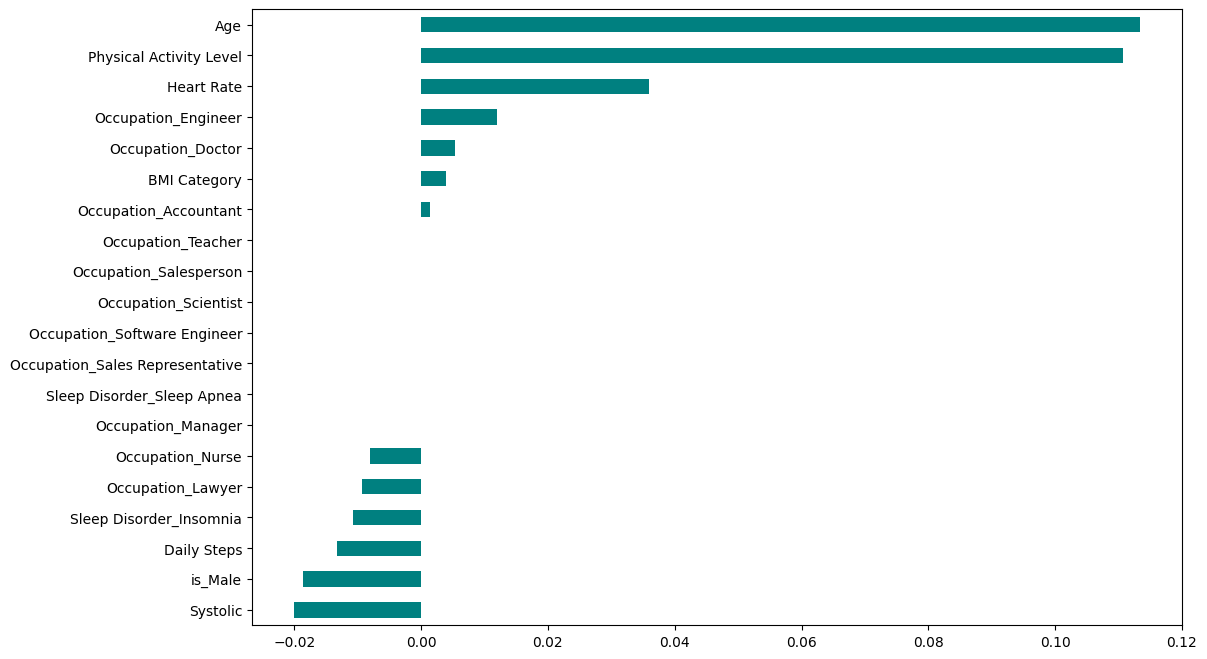

In [25]:
plt.figure(figsize= (12, 8))
perm_import.plot(kind='barh', color = 'teal')

plt.show()

## Evaluation

It looks like our `Forest` Model pulls ahead, with an accuracy of *89%* over our `Base` model of only *80%*

And based on our **confusion matrix**, we can also see that our `base` model is struggling in some distinguish bin 1 and 2 for some instances, but both model can predict well with instances that it is in bin 0 (`lacking sleep`)


And it looks like `Age` is an even more significant feature than `Stress` based on our *feature importance* graph

## Clustering

Now let's pick out some features to see how about our clustering task.

I picked these since they are not within the *targeting features* (I want to use clustering to find out about `Sleep Illnes`, `Sleep Duration`, `Occupation`)

In [26]:
features_to_cluster = [ 'Age', 'Physical Activity Level', 'Stress Level',
                       'Heart Rate', 'BMI Category']

X_cluster = scaler.fit_transform(df[features_to_cluster])


X_cluster.head(1)


,Age,Physical Activity Level,Stress Level,Heart Rate,BMI Category
0,-1.753096,-0.825418,0.347021,1.654719,1.004126


We will set up with `PCA` to reduce the dimensions of our features

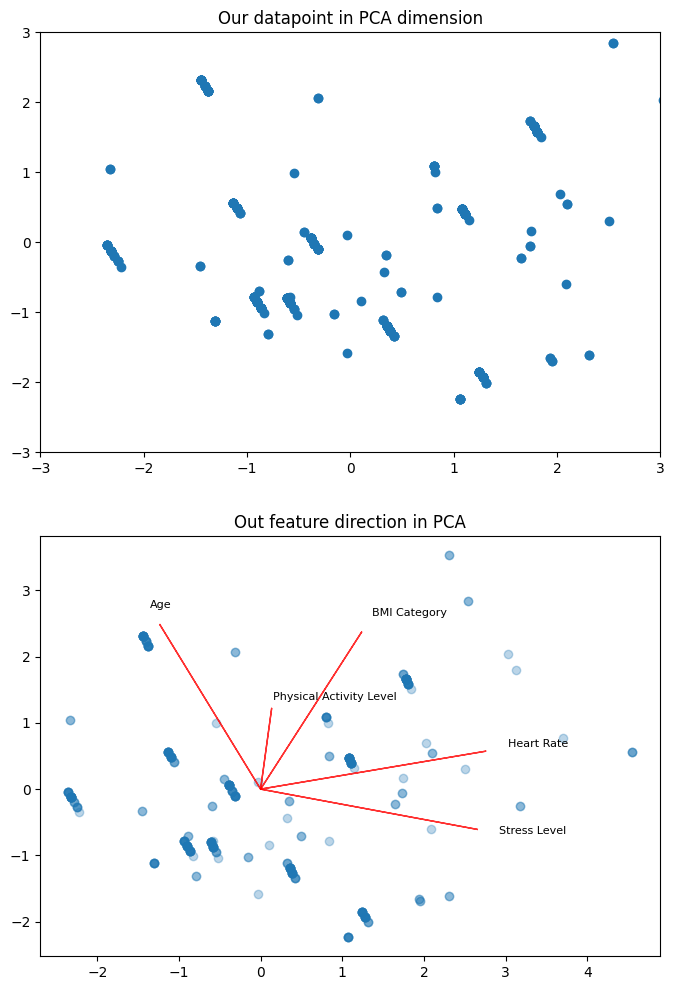

In [27]:
from sklearn.decomposition import PCA


# Make graph bigger to see
scale_factor = 3

pca = PCA(n_components= 2)

pca_data = pca.fit_transform(X_cluster)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize= (8 , 12))
plt.subplot(2, 1, 1)

plt.scatter(pca_data.iloc[:, 0], pca_data.iloc[:, 1])
plt.title("Our datapoint in PCA dimension")

plt.xlim(-scale_factor, scale_factor)
plt.ylim(-scale_factor, scale_factor)

plt.subplot(2, 1, 2)
plt.scatter(pca_data.iloc[:, 0], pca_data.iloc[:, 1], alpha = 0.3)

for i, feature in enumerate(features_to_cluster):
    x_val = loadings[i, 0] * scale_factor
    y_val = loadings[i, 1] * scale_factor
    plt.arrow(0, 0, x_val, y_val,
              color = 'red', alpha = 0.8)
    
    plt.text(x_val * 1.1, y_val * 1.1, feature, color='black', fontsize=8)
    


plt.title("Out feature direction in PCA")
plt.show()

Based on the grapgh, it looks like:
- `Age` have its own direction
- `BMI Category` and `Physical Activity Level` is sharing the path, showing there relation
- `Stress Level` and `Heart Rate` also relates

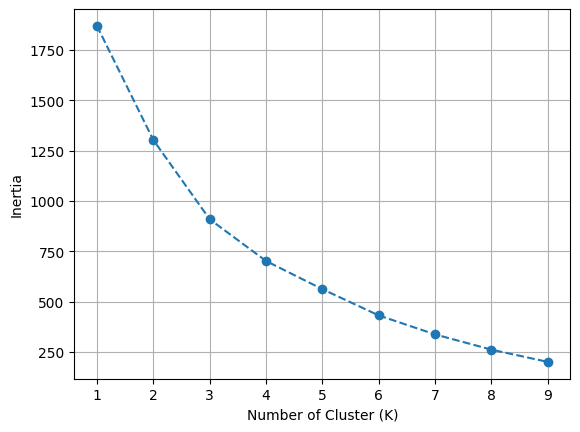

In [28]:
from sklearn.cluster import KMeans
inertia = []

K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters= k, random_state= 8, n_init= 10)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker = 'o', linestyle = '--')
plt.xlabel('Number of Cluster (K)')
plt.ylabel('Inertia')

plt.grid(True)

plt.show()


From the `Elbow method` it's quite difficult to get the best k here, since **5, 6, 7** performs well.

Let's try using `silhouette_score` to see what should we use

In [29]:
from sklearn.metrics import silhouette_score

best_k_cand = [2, 3, 4, 5, 6, 7, 8]


for k in best_k_cand:
    kmeans_final = KMeans(n_clusters= k, random_state= 8, n_init= 10)

    labels = kmeans_final.fit_predict(X_cluster)

    score = silhouette_score(X_cluster, labels)
    print(f"Silhouette Score for k = {k}: {score}")

Silhouette Score for k = 2: 0.34721962217681707
Silhouette Score for k = 3: 0.4196495735898834
Silhouette Score for k = 4: 0.47318585780070843
Silhouette Score for k = 5: 0.518777478289988
Silhouette Score for k = 6: 0.5788995544832648
Silhouette Score for k = 7: 0.6101840019499719
Silhouette Score for k = 8: 0.6623239522927029


The score are quite close, but I would say `5` or `6` is good here

In [30]:
# Create a quick comparison function
def profile_clusters(k_val, data, original_df):
    model = KMeans(n_clusters=k_val, random_state=8, n_init=10)
    labels = model.fit_predict(data)
    
    # Add labels to a copy of the original dataframe
    temp_df = original_df.copy()
    temp_df['Cluster'] = labels
    
    # Calculate the mean of the 5 features for each cluster
    profile = temp_df.groupby('Cluster')[features_to_cluster].mean()
    return profile

# Compare them


print("\n--- 5 Clusters Profile ---")
print(profile_clusters(5, X_cluster, df))

print("--- 6 Clusters Profile ---")
print(profile_clusters(6, X_cluster, df))


--- 5 Clusters Profile ---
               Age  Physical Activity Level  Stress Level  Heart Rate  \
Cluster                                                                 
0        44.443299                60.597938      7.092784   74.927835   
1        36.860140                70.489510      4.909091   68.944056   
2        48.932203                36.355932      3.525424   65.000000   
3        57.500000                75.833333      3.083333   68.055556   
4        31.743590                33.256410      7.820513   72.564103   

         BMI Category  
Cluster                
0            1.103093  
1            0.000000  
2            0.457627  
3            0.944444  
4            0.000000  
--- 6 Clusters Profile ---
               Age  Physical Activity Level  Stress Level  Heart Rate  \
Cluster                                                                 
0        36.902778                70.326389      4.923611   68.944444   
1        49.611111                88.333333   


#### **K=5 Analysis (Broad Profiles)**

1. **Cluster 0**: Middle-aged, High Stress, Moderate Activity.
2. **Cluster 1**: Young, Balanced Activity, Moderate Stress (Healthy Baseline).
3. **Cluster 2**: Sedentary Older Adults, Low Stress.
4. **Cluster 3**: Active "Relaxed" Seniors (Highest Age, Lowest Stress).
5. **Cluster 4**: Stressed Sedentary Youth.

#### **K=6 Analysis (Detailed Behavioral Profiles)**

1. **Cluster 0**: Balanced Young Professionals (High Activity, Moderate Stress).
2. **Cluster 1**: **The High-Stress Athletes** (Highest Activity, Highest Heart Rate).
3. **Cluster 2**: Stressed Sedentary Youth (Highest Stress, Lowest Activity).
4. **Cluster 3**: **The High-Stress Sedentary** (Middle-aged, High BMI, Moderate Activity).
5. **Cluster 4**: Active "Relaxed" Seniors (Age 57+, Lowest Stress).
6. **Cluster 5**: Sedentary Older Adults (Age 49, Low Stress, Low Activity).

---

### Key Differences in Segmentation

* **The "High-Stress" Split**: In `K = 5`, Cluster 0 combined middle-aged individuals with high stress and moderate activity. In `K = 6`, this group is refined into two distinct profiles: **Cluster 1** (High Activity/Max Stress) and **Cluster 3** (Lower Activity/High Stress).
* **Physical Activity Extremes**:  `K = 6` identifies a "Peak Performance" group (Cluster 1) with an average activity level of **88.3**, which was previously averaged out in the 5-cluster model.
* **BMI Precision**: `K = 6` shows that the highest BMI categories are concentrated in the middle-aged, high-stress groups (Clusters 1 and 3), whereas `K = 5` showed more generalized BMI distributions.

---

Let's see what else can we get from our cluster


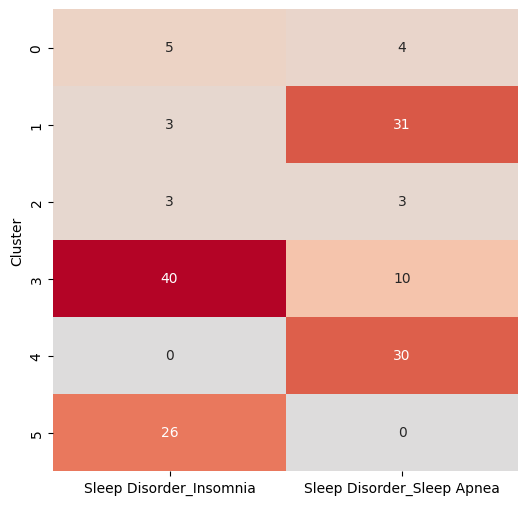

In [31]:
# 1. Fit final model and add labels to original df
kmeans_6 = KMeans(n_clusters=6, random_state=8, n_init=10)
df['Cluster'] = kmeans_6.fit_predict(X_cluster)


cluster_disorders = df.groupby('Cluster')[['Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea']].sum()

plt.figure(figsize= (6, 6))

sns.heatmap(cluster_disorders, cmap = 'coolwarm',
            center = 0, annot = True, cbar =False)
plt.show()

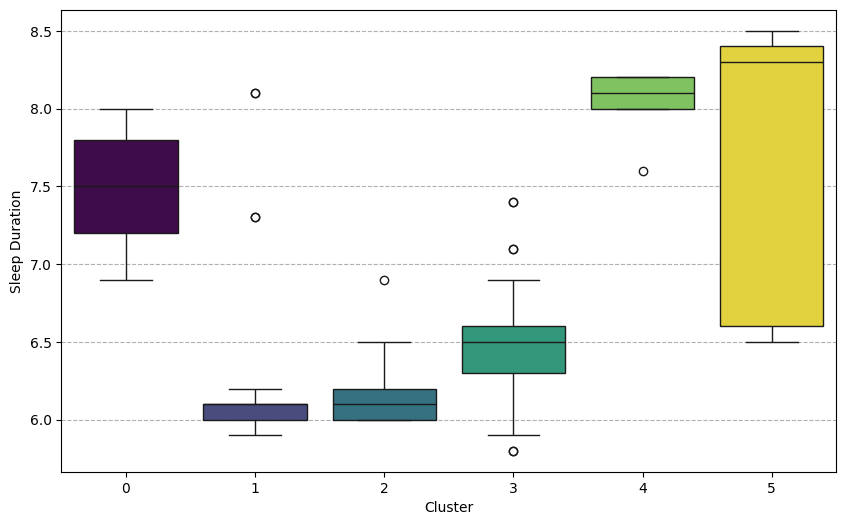

In [32]:
plt.figure(figsize= (10, 6))

sns.boxplot(df, x = 'Cluster', hue = 'Cluster', legend = False,
             y = 'Sleep Duration', palette='viridis')
plt.xlabel("Cluster")
plt.ylabel("Sleep Duration")

plt.grid(axis = 'y', linestyle = '--')
plt.show()

**Insight**


### 1. Sleep Disorder Heatmap 


* **Cluster 3 (The Insomnia Center):** With **40** cases of Insomnia, this group is the primary "at-risk" segment for that disorder.
* **Cluster 1 & Cluster 4 (The Apnea Centers):** These clusters are the hotspots for Sleep Apnea, with **31** and **30** cases respectively.
* **Cluster 5:** Shows a strong secondary concentration of Insomnia (**26** cases).
* **Clusters 0 & 2:** These are the "Healthy" baseline groups with almost no disorder activity.

### 3. Sleep Duration Boxplot

This plot shows exactly how much rest each group is actually getting:

* **Cluster 5 (The Sleep Winners):** This group has the highest median sleep duration, reaching up toward 8.5 hours, though with a very wide spread.
* **Cluster 1 & Cluster 2 (The Sleep Deprived):** These groups are struggling the most, with median durations sitting right at **6.0 hours**.
* **Cluster 4:** Shows very high-quality, consistent sleep (tight box) above 8 hours, proving they are the "Healthy Senior" profile.

---

## TLDR

* **Healthy Profiles (Clusters 0, 4, 5):** High sleep duration and low stress. Cluster 4 is particularly notable for high age but excellent sleep health.
  
* **At-Risk Profiles (Clusters 1, 2, 3):** These groups combine high stress with low sleep duration ( hours).
* **Cluster 1** is the high-activity/high-stress group prone to **Apnea**.
* **Cluster 3** is the middle-aged/high-stress group prone to **Insomnia**.

---
Let's see if we can pull any `occupation` based on the clustering


In [33]:
df.columns

Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea',
       'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'Systolic', 'Diastolic', 'is_Male',
       'Sleep Target', 'Cluster'],
      dtype='str')

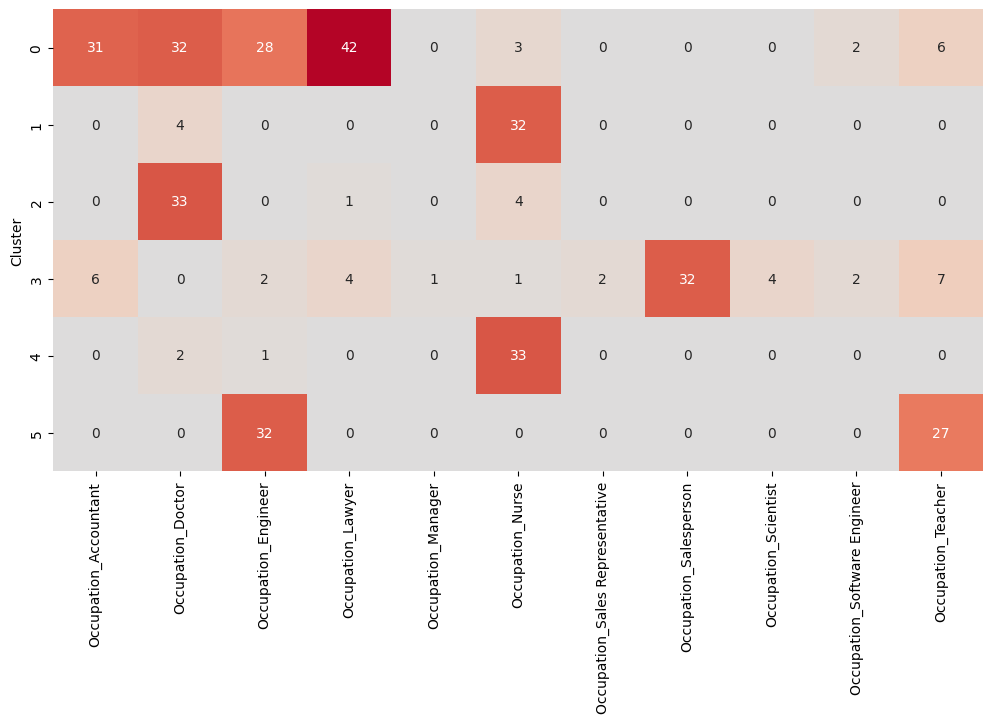

In [34]:

cluster_disorders = df.groupby('Cluster')[['Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher']].sum()

plt.figure(figsize= (12, 6))
sns.heatmap(cluster_disorders, cmap= 'coolwarm', 
            center = 0, annot = True, cbar = False)

plt.show()


### Insights

#### **Cluster 0 – Balanced Young Professionals**

* Broadly distributed across **Accountants, Doctors, Engineers, and Lawyers**.
* No single occupation dominates, suggesting a **heterogeneous working population**.
* This aligns with earlier findings of **moderate stress, balanced activity, and generally healthy sleep**, consistent with early-career professionals across multiple fields.

---

#### **Cluster 1 – High-Stress Athletes**

* Strongly concentrated in **Nursing** roles.
* Minimal representation from other occupations.
* This matches the prior profile:
  * **High stress**
  * **High activity**
  * Elevated **Sleep Apnea prevalence**
* Nursing is a known **high-pressure, shift-based profession**, reinforcing the physiological stress and sleep disruption observed.

---

#### **Cluster 2 – Stressed Sedentary Youth**

* Dominated by **Doctors**, with very little spread beyond that.
* Despite medical knowledge, this group shows:
  * **High stress**
  * **Low activity**
  * **Short sleep duration**
* This supports the interpretation of **young professionals in demanding cognitive roles**, where stress outweighs health-protective behaviors.

---

#### **Cluster 3 – High-Stress Sedentary**
* Strong concentration in **Salesperson** roles, with secondary presence across several professions.
* This is the **primary Insomnia cluster**, which fits well with:

  * Performance-driven jobs
  * Irregular schedules
  * Psychosocial stress rather than physical exertion
* Sales roles often involve **variable hours and outcome pressure**, consistent with chronic sleep disruption.

---

#### **Cluster 4 – Active Relaxed Seniors**

* Almost entirely composed of **Nurses**.
* Despite overlap in occupation with Cluster 1, this group differs sharply:

  * **Lowest stress**
  * **Longest and most consistent sleep**
  * Older age profile
* This suggests a **career-stage effect**: experienced professionals with stable routines and reduced stress reactivity.

---

#### **Cluster 5 – Sedentary Older Adults**

* Heavily represented by **Engineers and Teachers**.
* Secondary concentration of Insomnia, but paired with **longer sleep duration overall**.
* Likely reflects:

  * Late-career professionals
  * Lower physical activity
  * Lower stress, but potential circadian or lifestyle-driven sleep issues

---

## Summary of findings

* **Occupation alone does not determine sleep health** — the same profession (e.g., Nursing) appears in both high-risk and healthy clusters.
* **Age, stress, and activity level** are the dominant mediators between occupation and sleep outcomes.
* High-pressure, performance-driven roles (Sales, early-career Medicine, frontline Nursing) align with **Insomnia and Apnea risk**, while later-career stability shifts the same occupations into healthier profiles.

